In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
import numpy as np
import geopandas as gpd

In [75]:
# Chargement de la base de données
path = 'Bases de données/revenus.csv'
df = pd.read_csv(path, sep = ';')

#Harmonisation des noms de colonnes
rename = {'CodePostal' : 'Code postal',' Niveau de Vie Commune ':'Niveau de vie commune', ' NiveaudevieDépartement ':'Niveau de vie département', 'Departement' : 'Département'}
df = df.rename(rename, axis= 1)

# Conversion la colonne 'CodePostal' en type chaîne de caractères
df['Code postal'] = df['Code postal'].astype(str)

# Ajout d'un zéro aux codes postaux de moins de 5 caractères
df['Code postal'] = df['Code postal'].apply(lambda x: x.zfill(5))

# Ajout d'une colonne 'Departement' en extrayant les deux premiers caractères du code postal
df['Département'] = df['Code postal'].str[:2]

# Conversion de la colonne 'Revenu' en type numérique
df['Niveau de vie département'] = df['Niveau de vie département'].apply(lambda x: x.replace(' ', ''))
df['Niveau de vie département'] = pd.to_numeric(df['Niveau de vie département'])

# Sélection de la colonne 'Revenu' correspondant au département
dfrevdep = df[['Département', 'Niveau de vie département']].copy()

# Supprimer les doublons, ne conservant qu'une ligne par département
dfrevdep = dfrevdep.drop_duplicates()

# Réinitialiser l'index
dfrevdep.reset_index(drop=True, inplace=True)

# Afficher le DataFrame résultat
print(dfrevdep)

   Département  Niveau de vie département
0           01                      22344
1           02                      18111
2           03                      18829
3           04                      19008
4           05                      19203
..         ...                        ...
91          93                      17192
92          94                      22314
93          95                      21296
94          2A                      19525
95          2B                      18016

[96 rows x 2 columns]


In [46]:
!pip install --upgrade xlrd #colab bug verson xlrd
!pip install geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 10.2 MB/s eta 0:00:00


In [47]:
!pip install plotnine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.7/73.7 kB 4.6 MB/s eta 0:00:00


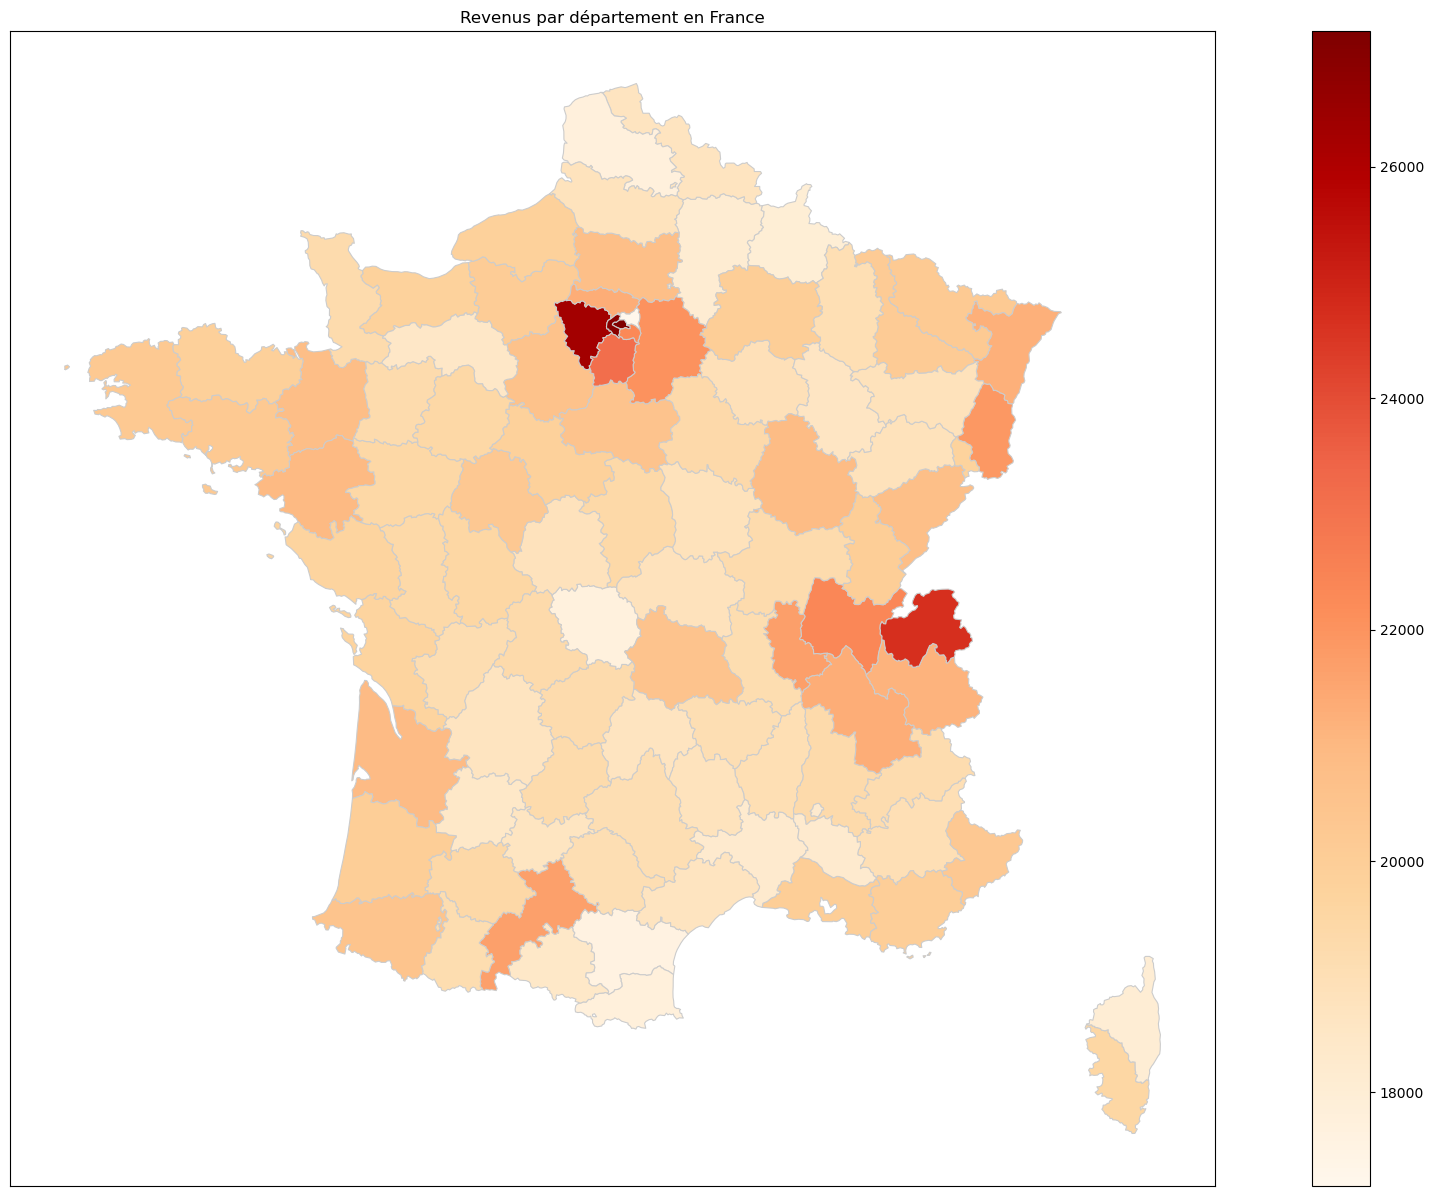

In [68]:
# Charger le fichier shapefile des départements français
path = 'Bases de données/departements-version-simplifiee.geojson'
map_df = gpd.read_file(path)

# Fusionner le DataFrame des revenus avec le GeoDataFrame des départements
merged = map_df.set_index('code').join(dfrevdep.set_index('Département'))


# Créer une figure et des axes pour la carte
fig, ax = plt.subplots(1, 1, figsize=(25, 15))

# rendre les axes invisibles
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

plt.grid(True)

# Plotter la carte en utilisant les revenus pour la coloration
merged.plot(column='Niveau de vie département', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Ajouter un titre
plt.title('Revenus par département en France')

# Afficher la carte
plt.show()

In [78]:
#Lier chaque ville à son département
dfvilledep = df[['Département', 'Nom Commune']].copy()

# Réinitialiser l'index
dfvilledep.reset_index(drop=True, inplace=True)

# Afficher le DataFrame résultat
dfvilledep

,Département,Nom Commune
0,01,L'Abergement-Clémenciat
1,01,L'Abergement-de-Varey
2,01,Ambérieu-en-Bugey
3,01,Ambérieux-en-Dombes
4,01,Ambléon
...,...,...
36567,2B,Zalana
36568,2B,Zilia
36569,2B,Zuani
36570,2B,San-Gavino-di-Fiumorbo


In [83]:
# Chargement de la base de données des votes par départements
path ='Bases de données/votes.csv'
df2= pd.read_csv(path, sep=';')

# Supprimer les colonnes vides
df2 = df2.dropna(axis=1, how='all')

# Afficher le DataFrame après suppression des colonnes vides
df2

,Code du département,Libellé du département,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,Blancs,% Blancs/Ins,% Blancs/Vot,...,%popent12,%popvot12,Parti13,Nbvoix13,%popent13,%popvot13,Parti14,Nbvoix14,%popent14,%popvot14
0,01,Ain,440697,229508,52.08,211189,47.92,2964,0.67,1.40,...,9.88,21.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02,Aisne,374297,202419,54.08,171878,45.92,2781,0.74,1.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,03,Allier,250510,122922,49.07,127588,50.93,2505,1.00,1.96,...,2.18,4.41,RN,24304.0,9.70,19.61,NaN,NaN,NaN,NaN
3,04,Alpes-de-Haute-Provence,128623,61661,47.94,66962,52.06,1283,1.00,1.92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,05,Hautes-Alpes,113917,53545,47.00,60372,53.00,1015,0.89,1.68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,ZP,Polynésie française,206297,119320,57.84,86977,42.16,767,0.37,0.88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,ZS,Saint-Pierre-et-Miquelon,5053,2352,46.55,2701,53.45,38,0.75,1.41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,ZW,Wallis et Futuna,9592,2089,21.78,7503,78.22,34,0.35,0.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,ZX,Saint-Martin/Saint-Barthélemy,24563,19344,78.75,5219,21.25,107,0.44,2.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
# suppression de quelques colonnes
colonnes_a_supprimer = ['Inscrits', 'Abstentions', '% Abs/Ins','Votants','% Vot/Ins', 'Blancs','% Blancs/Ins','% Blancs/Vot','Nuls','% Nuls/Ins','% Nuls/Vot','Exprimés','% Exp/Ins','% Exp/Vot','Sièges','% Voix/Ins','% Voix/Exp']

# Supprimer les colonnes spécifiées
df2 = df2.drop(columns=colonnes_a_supprimer)

# Afficher le DataFrame après suppression des colonnes
df2

,Code du département,Libellé du département,Code Nuance,Voix,Parti1,Nbvoix1,%popent1,%popvot1,Parti2,Nbvoix2,...,%popent12,%popvot12,Parti13,Nbvoix13,%popent13,%popvot13,Parti14,Nbvoix14,%popent14,%popvot14
0,01,Ain,DXG,1809,RDG,2215,0.50,1.07,NUP,46671,...,9.88,21.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02,Aisne,DXG,2744,NUP,40464,10.81,24.08,DVG,505,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,03,Allier,DXG,1457,RDG,2584,1.03,2.08,NUP,30034,...,2.18,4.41,RN,24304.0,9.70,19.61,NaN,NaN,NaN,NaN
3,04,Alpes-de-Haute-Provence,DXG,890,NUP,18684,14.53,28.67,DVG,1249,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,05,Hautes-Alpes,DXG,594,NUP,16927,14.86,28.73,DVG,1077,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,ZP,Polynésie française,DXG,86,ECO,2477,1.20,2.90,DIV,747,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,ZS,Saint-Pierre-et-Miquelon,DVG,1314,DIV,473,9.36,17.90,DVD,856,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,ZW,Wallis et Futuna,DVG,1061,ECO,922,9.61,12.39,DVC,5457,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,ZX,Saint-Martin/Saint-Barthélemy,DIV,304,REG,199,0.81,3.93,DVC,2383,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
#DataFrame des votes par département pour le parti écologiste aux législatives 2022
diccolumns1 = {'Nbvoix1' : 'Nbvoix', '%popent1' :'%popent', '%popvot1':'%popvot'}
diccolumns2 = {'Nbvoix2' : 'Nbvoix', '%popent2' :'%popent', '%popvot2':'%popvot'}
diccolumns3 = {'Nbvoix3' : 'Nbvoix', '%popent3' :'%popent', '%popvot3':'%popvot'}
diccolumns4 = {'Nbvoix4' : 'Nbvoix', '%popent4' :'%popent', '%popvot4':'%popvot'}

dféco1 = df2[['Code du département', 'Libellé du département', 'Nbvoix1', '%popent1', '%popvot1']].where(df2['Parti1']=='ECO').dropna()
dféco1 = dféco1.rename(diccolumns1, axis=1)
dféco2 = df2[['Code du département', 'Libellé du département', 'Nbvoix2', '%popent2', '%popvot2']].where(df2['Parti2']=='ECO').dropna()
dféco2 = dféco2.rename(diccolumns2, axis=1)
dféco3 = df2[['Code du département', 'Libellé du département', 'Nbvoix3', '%popent3', '%popvot3']].where(df2['Parti3']=='ECO').dropna()
dféco3 = dféco3.rename(diccolumns3, axis=1)
dféco4 = df2[['Code du département', 'Libellé du département', 'Nbvoix4', '%popent4', '%popvot4']].where(df2['Parti4']=='ECO').dropna()
dféco4 = dféco4.rename(diccolumns4, axis=1)

dféco = pd.concat([dféco1, dféco2, dféco3, dféco4], axis=0)
dféco.sort_values('Code du département', inplace=True)

#De même pour la NUPES
dfnupes1 = df2[['Code du département', 'Libellé du département', 'Nbvoix1', '%popent1', '%popvot1']].where(df2['Parti1']=='NUP').dropna()
dfnupes1 = dfnupes1.rename(diccolumns1, axis=1)
dfnupes2 = df2[['Code du département', 'Libellé du département', 'Nbvoix2', '%popent2', '%popvot2']].where(df2['Parti2']=='NUP').dropna()
dfnupes2 = dfnupes2.rename(diccolumns2, axis=1)

dfnupes = pd.concat([dfnupes1,dfnupes2], axis=0)
dfnupes.sort_values('Code du département', inplace=True)

#Suppression des outre-mer
dféco.drop(index= [96, 97, 99, 102, 104, 106], inplace=True)
dfnupes.drop(index=106, inplace=True)


In [142]:
dféconupes = pd.DataFrame()

In [145]:
#Compilation des votes
dféconupes[['Code du département', 'Libellé du département']] = dfnupes[['Code du département', 'Libellé du département']]
dféconupes['Nbvoix'] = dféco['Nbvoix'] + dfnupes['Nbvoix']
dféconupes['%popent'] = dféco['%popent'] + dfnupes['%popent']
dféconupes['%popvot'] = dféco['%popvot'] + dfnupes['%popvot']

In [146]:
dféconupes

,Code du département,Libellé du département,Nbvoix,%popent,%popvot
0,01,Ain,51895.0,11.78,25.04
1,02,Aisne,41356.0,11.05,24.61
2,03,Allier,32573.0,13.00,26.28
3,04,Alpes-de-Haute-Provence,21558.0,16.76,33.08
4,05,Hautes-Alpes,18685.0,16.40,31.71
...,...,...,...,...,...
91,91,Essonne,132255.0,16.44,35.12
92,92,Hauts-de-Seine,165750.0,16.51,31.63
93,93,Seine-Saint-Denis,148000.0,18.49,48.64
94,94,Val-de-Marne,150867.0,18.80,40.26
